# Hands on Session: Langchain Output Parser

## Use case: Information Extraction

LLMs can be used to generate text that is structured according to a specific schema. This can be useful in a number of scenarios, including:

- Extracting a structured row to insert into a database
- Extracting API parameters
- Extracting different parts of a user query (e.g., for semantic vs keyword search)


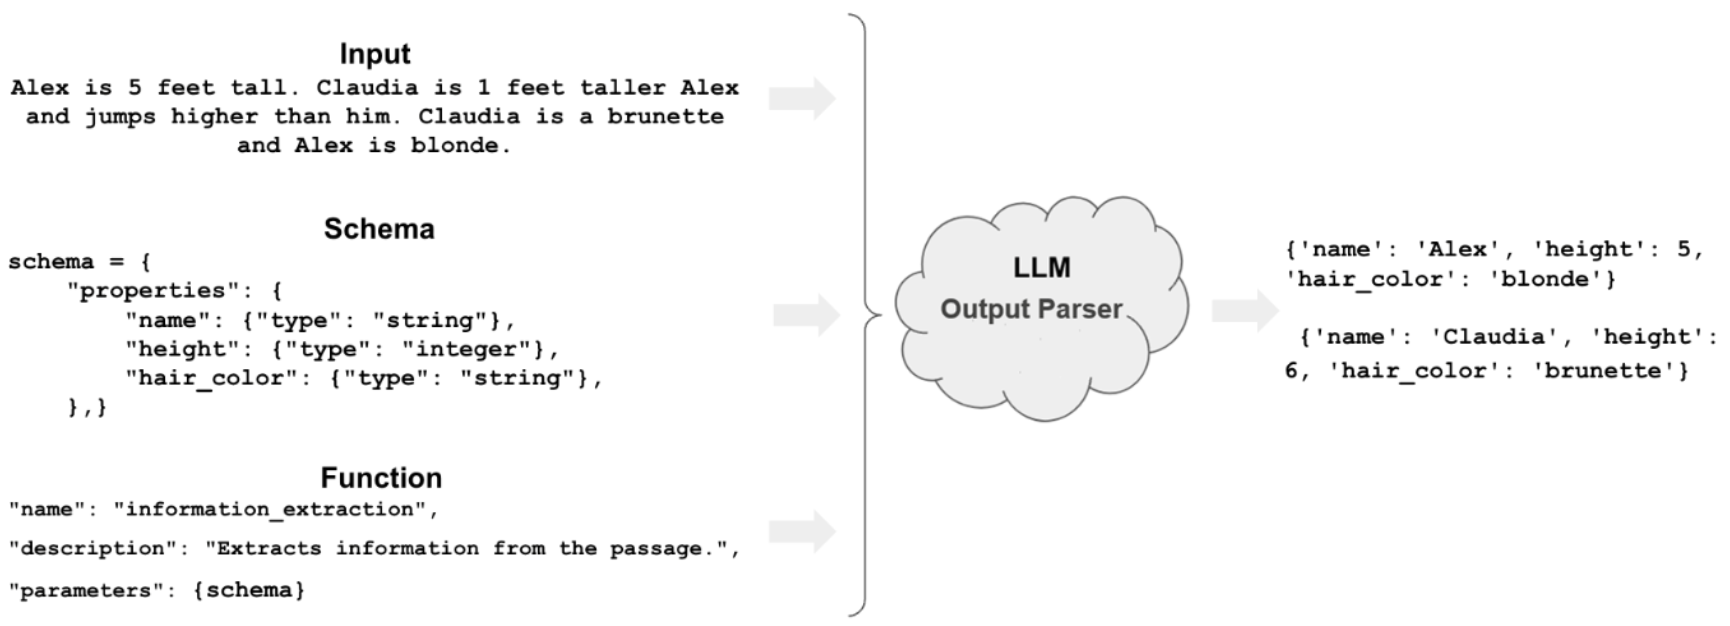

## **Setup**

### **0. Set up the Colab in your drive**

- Load this Colab from Github
- Run the first cell to install all required packages (this takes a moment)
- During installation jump to section `"Set OpenAI API Key"` and put the key we provide you in the input field.

### **1. Required python packages**

In [ ]:
# install required packages; this may take some minutes; ignore dependency warnings it should work anyway
%pip install langchain langchain_openai langchain_core


### **2. Import necessary libraries**

In [ ]:
import langchain


### **3. Set OpenAI API key**

In [ ]:
from getpass import getpass
OPENAI_API_KEY = getpass()

··········


### **Challenge: Challenge: Enhancing the People Parser**


The following was the parser from the [live coding session](https://colab.research.google.com/drive/1KDlOPajyvYbKH70txqCy1vfhG9v_Mr5n#scrollTo=178dbc59):
```
from typing import Optional, Sequence

from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field, validator
from langchain_openai import ChatOpenAI


# Define your desired data structure.
class Person(BaseModel):
    person_name: str
    person_height: int
    person_hair_color: str
    dog_breed: Optional[str]
    dog_name: Optional[str]

class People(BaseModel):
    """Identifying information about all people in a text."""

    people: Sequence[Person]


# Analyzing the Prompt Setup
query = """Alex is 5 feet tall. Claudia is 1 feet taller Alex and jumps higher than him. Claudia is a brunette and Alex is blond."""
## Set up a parser + inject instructions into the prompt template.
parser = PydanticOutputParser(pydantic_object=People)
## Prompt
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={
        "format_instructions": parser.get_format_instructions()},
)
## Getting Input with validated prompt
_input = prompt.format_prompt(query=query)


# Load the Model
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY)
```





**Extend the Person Model:**

- Add new fields to the Person class to capture additional information you want to extract.
- Consider attributes like occupation, hobbies, or age.



```
class Person(BaseModel):
    person_name: str
    person_height: int
    person_hair_color: str
    dog_breed: Optional[str]
    dog_name: Optional[str]
    # New fields
    hobbies: Optional[str] = None
    occupation: Optional[str] = None

```

**Update the Parser Instructions:**

- Modify the parsing instructions within the prompt template to guide the AI in extracting and structuring the new information.
- This may involve crafting more detailed prompts or adjusting the format instructions to accommodate the new fields.


**Enhance the Query:**

- Adjust the example query or create new queries that include the additional information your enhanced model aims to capture.
- This will serve as a test to ensure your modifications are effective.



```
query = """Alex is 5 feet tall, loves programming, and works as a software engineer. Claudia is 1 foot taller than Alex, enjoys hiking, and is a graphic designer. Claudia is a brunette and Alex is blond."""

```


**Final Output:**



```
{
  "people": [
    {
      "person_name": "Alex",
      "person_height": 5,
      "person_hair_color": "blond",
      "dog_breed": None,
      "dog_name": None,
      "hobbies": "programming",
      "occupation": "software engineer"
    },
    {
      "person_name": "Claudia",
      "person_height": 6,  // Assuming "1 foot taller than Alex" is correctly calculated
      "person_hair_color": "brunette",
      "dog_breed": None,
      "dog_name": None,
      "hobbies": "hiking",
      "occupation": "graphic designer"
    }
  ]
}

```




In [ ]:
## Look for the Live Coding session for Help
### ENTER YOUR CODE HERE 👇 ###



In [ ]:
# Testing and Experimentation
### ENTER YOUR CODE HERE 👇 ###

People(people=[Person(person_name='Alex', person_height=5, person_hair_color='blond', dog_breed=None, dog_name=None, hobbies='programming', occupation='software engineer'), Person(person_name='Claudia', person_height=6, person_hair_color='brunette', dog_breed=None, dog_name=None, hobbies='hiking', occupation='graphic designer')])

### **Encouragement for Further Exploration:**
To foster creativity and deeper understanding, we encourage you to play arounf more to extract the infromation from unstructured text.